In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from cycler import cycler
import pprint
import matplotlib.pyplot as plt

import numpy as np
import torch
import torch.optim as optim

from models import *
from optim import get_lr_scheduler
from optim import lr_scheduler_list

In [3]:
print('PyTorch version:', torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if torch.cuda.is_available(): print('cuda is available.')
else: print('cuda is unavailable.') 

PyTorch version: 1.11.0+cu113
cuda is available.


In [4]:
colors = ['limegreen', 'mediumpurple', 'darkorange', 
          'dodgerblue', 'lightcoral', 'goldenrod', 
          'indigo', 'darkgreen', 'navy', 'brown']

cc = (cycler(linestyle=['-', '--', '-.']) * cycler(color=colors))

print(cc)

(cycler('linestyle', ['-', '--', '-.']) * cycler('color', ['limegreen', 'mediumpurple', 'darkorange', 'dodgerblue', 'lightcoral', 'goldenrod', 'indigo', 'darkgreen', 'navy', 'brown']))


In [5]:
cfg_model = {}
cfg_model['in_channels'] = 20  # 19-21
cfg_model['out_dims'] = 3  # 2 or 3
cfg_model['model'] = '1D-ResNeXt-5x'
cfg_model['generator'] = ResNet1D
cfg_model['block'] = BottleneckBlock1D
cfg_model['conv_layers'] = [3, 4, 6, 3]
cfg_model['fc_stages'] = 3
cfg_model['use_age'] = 'fc'
cfg_model['final_pool'] = 'max'
cfg_model['base_channels'] = 64
cfg_model['groups'] = 32
cfg_model['LR'] = None
cfg_model['activation'] = 'relu'
model = cfg_model['generator'](**cfg_model).to(device, dtype=torch.float32)

In [6]:
base_lr = 5e-3
iterations = (250000 * 32) // 128
warmup_steps = 10000 # iterations // 10

In [7]:
optimizer = optim.AdamW(model.parameters(),
                        lr=base_lr,
                        weight_decay=1e-3)

In [8]:
pprint.pprint(lr_scheduler_list)

['constant_with_decay',
 'transformer_style',
 'cosine_decay_with_warmup_half',
 'cosine_decay_with_warmup_one_and_half',
 'cosine_decay_with_warmup_two_and_half',
 'get_linear_with_warmup']


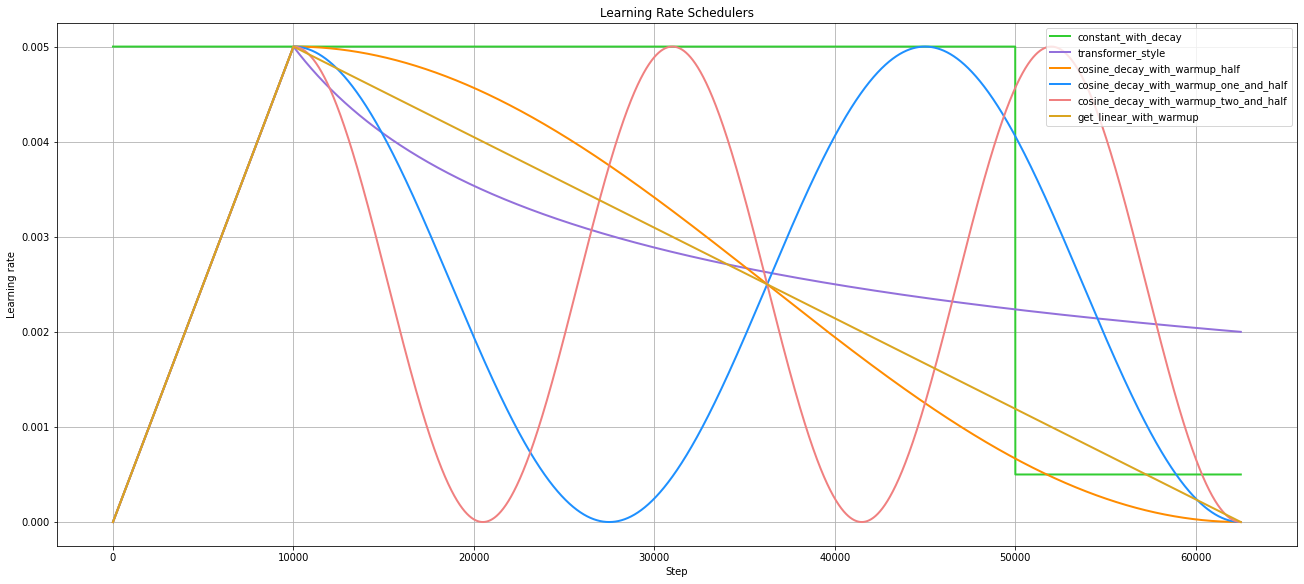

In [9]:
fig = plt.figure(num=1, clear=True, 
                 constrained_layout=True, figsize=(18.0, 8.0))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Learning Rate Schedulers')
ax.set_prop_cycle(cc)
ax.set_xlabel('Step')
ax.set_ylabel('Learning rate')

for s, scheduler_type in enumerate(lr_scheduler_list):
    scheduler = get_lr_scheduler(optimizer, scheduler_type=scheduler_type, 
                                 iterations=iterations, warmup_steps=warmup_steps)

    lr_record = [optimizer.state_dict()['param_groups'][0]['lr']]
    
    for i in range(iterations):
        optimizer.step()
        scheduler.step()
        lr_record.append(optimizer.state_dict()['param_groups'][0]['lr'])
    
    ax.plot(np.arange(len(lr_record)), lr_record, lw=2, label=scheduler_type)
    
ax.legend()
ax.grid(True)
plt.show()
fig.clear()
plt.close(fig)

In [15]:
torch.arange(0, 512, 2)

tensor([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
         28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,  54,
         56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,
         84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110,
        112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138,
        140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166,
        168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194,
        196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222,
        224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250,
        252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278,
        280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306,
        308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334,
        336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 3